In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [2]:
img1 = cv2.imread("data/ljubljana_1.png")
img2 = cv2.imread("data/ljubljana_2.png")
img3 = cv2.imread("data/ljubljana_3.png")
img4 = cv2.imread("data/ljubljana_4.png")
images = [img1, img2, img3, img4]

In [3]:
def prikazi_sliko(img):
    cv2.imshow("slika", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def skaliraj_sliko(img, faktor):
    sirina = int(img.shape[1] / faktor)
    visina = int(img.shape[0] / faktor)
    dim = (sirina, visina)
    return cv2.resize(img, dim,  interpolation = cv2.INTER_AREA)

In [4]:
slike_za_obdelavo = cv2.createStitcher()
(status, slika_spojena) = slike_za_obdelavo.stitch(images)
if status == 0:
    print("Spenjanje slik je uspelo")
    print("Dimenzija spojene slike:    ", slika_spojena.shape)

Spenjanje slik je uspelo
Dimenzija spojene slike:     (1276, 1823, 3)


In [9]:
slika_spojena = skaliraj_sliko(slika_spojena, 2)
slika_spojena = cv2.copyMakeBorder(slika_spojena, 10, 10, 10, 10, cv2.BORDER_CONSTANT, (0, 0, 0))
prikazi_sliko(slika_spojena)

Text(0.5, 1.0, 'Zunanji rob spojene slike')

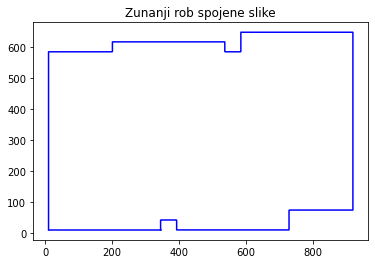

In [7]:
slika_sivinska = cv2.cvtColor(slika_spojena, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(slika_sivinska, 0, 255, cv2.THRESH_BINARY)[1]
kont = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
obroba = imutils.grab_contours(kont)
obroba = obroba[0]
plt.plot(obroba[:,:, 0], obroba[:,:, 1], 'b')
# povezi prvo in zadnjo tocko
plt.plot([obroba[0,:,0], obroba[-1,:,0]], [obroba[0,:,1], obroba[-1,:,1]], 'b')
plt.title("Zunanji rob spojene slike")

In [8]:
# Obrezovanje

kont = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# zajamemo ogljisca obrobe
obroba = imutils.grab_contours(kont)
# vrednosti v array
obrobaMax = max(obroba, key=cv2.contourArea)
# ustvarimo masko obmocja znotraj slike
mask = np.zeros(thresh.shape, dtype="uint8")
(x, y, w, h) = cv2.boundingRect(obrobaMax)
# argumenti: zacetek, konec, barva, debelina
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)
# kopije maske
# prva za obmocje najmanjsega kvadrata slike
# druga je stevec za iteracijo zmanjsevanja kvadrata
pravo = mask.copy()
nicla = mask.copy()
# iteriramo dokler niso vse vrednosti vecje od nic
while cv2.countNonZero(nicla) > 0:
    # zmanjsaj velikost maske nato odstej podrocja
    pravo = cv2.erode(pravo, None)
    nicla = cv2.subtract(pravo, thresh)
# rezultat je pravo, maska z najmanjsim obmocjem slike

# poiscemo obrobo pripravljenega najmanjsega kvadrata
obroba_prava = cv2.findContours(pravo.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
obroba_prava = imutils.grab_contours(obroba_prava)
# v array
obrobaMax = max(obroba_prava, key=cv2.contourArea)
# narisemo kvadrat
(x, y, w, h) = cv2.boundingRect(obrobaMax)

# uporabimo vrednosti odmikov kvadrata za zmanjsanje obsega spojene slike
slika_spojena = slika_spojena[y:y + h, x:x + w]
cv2.imwrite("metoda1_oSlika.png", slika_spojena) 

True